**Série 2 des exercices**
**1 Matrice de poids**

*a) Obtenez les formules générales pour les valeurs propres et les vecteurs propres de $W$.*

On débute avec les valeurs propres : 

On utilise $det(W-\lambda I) = (w_{11}-\lambda)(w_{22}-\lambda) - w_{12}w_{21} = 0$


$\lambda^2 - \lambda(w_{11}+w_{22}) + w_{11}w_{22}-w_{12}w_{21}$

Avec la formule quadratique :

$\lambda = \frac{(w_{11}w_{22})\pm \sqrt{(w_{11}+w_{22})^2 - 4(w_{11}w_{22} - w_{12}w_{21})}}{2} = \frac{(w_{11}w_{22})\pm \sqrt{w_{11}^2 + w_{22}^2 - 2w_{11}w_{22}+4w_{12}w_{21}}}{2}$

$\boxed{\lambda = \frac{1}{2}tr(A)\pm \sqrt{(\frac{1}{2}tr(A))^2-det(A)}}$

Pour les vecteurs propores

On utilise sympy :

In [1]:
import sympy as sp
import numpy as np

w11, w12, w21, w22 = sp.symbols("w_11 w_12 w_21 w_22")

matrix = sp.Matrix([[w11, w12], [w21, w22]])

eigenvec = matrix.eigenvects()

#Premier vecteur propre
eigenvec[0][-1][0]


Matrix([
[-w_22/w_21 + (w_11/2 + w_22/2 - sqrt(w_11**2 - 2*w_11*w_22 + 4*w_12*w_21 + w_22**2)/2)/w_21],
[                                                                                          1]])

In [2]:
#Deuxième vecteur propre
eigenvec[1][-1][0]

Matrix([
[-w_22/w_21 + (w_11/2 + w_22/2 + sqrt(w_11**2 - 2*w_11*w_22 + 4*w_12*w_21 + w_22**2)/2)/w_21],
[                                                                                          1]])

*b) Supposez que tous les poids sont positifs.  Vérifiez que la valeur propre dont le module est le plus grand est réelle.  De plus, vérifiez que le vecteur propre correspondant peut être choisi pour que tous ses éléments soient non-négatifs. Il s'agit d'une illustration de la forme la plus simple du théorème de Perron-Frobenius.*

On affiche nos valeurs propres:

In [3]:
#Première valeur propore

eigenval = matrix.eigenvals()

a = list(eigenval.keys())
a[0]

w_11/2 + w_22/2 - sqrt(w_11**2 - 2*w_11*w_22 + 4*w_12*w_21 + w_22**2)/2

In [4]:
#Deuxième valeur propre

eigenval = matrix.eigenvals()

a = list(eigenval.keys())
a[1]

w_11/2 + w_22/2 + sqrt(w_11**2 - 2*w_11*w_22 + 4*w_12*w_21 + w_22**2)/2

Dans les deux valeurs propres, on constate que la racine carré aura exactement la même valeur. Ainsi si la valeur de la racine carré est $\mathbb{R}^{+}$ alors la deuxième valeur propre est forcément plus grande puisque l'on vient additionner la racine carré au lieu de la soustraire. Si l'intérieurs de la racine carré est négatif, alors nous avons un nombre complexe où $\lambda_1 = \lambda_2^*$. À ce moment, ces valeurs propres auraient le mêmes module. Si $w_{11}^2 + w_{22}^2 > 2w_{11} w_{22}$, alors nous sommes convaicu que notre racine carré est toujours réel :

$w_{11}^2 + w_{22}^2 > 2w_{11}w_{22}$

$w_{11}^2 + w_{22}^2 - 2w_{11}w_{22} > 0$

$(w_{11}-w_{22})^2 > 0$ C'est vrai! Donc la racine carré n'est jamais négative lorsque les entrées sont positives. On peut donc conclure que le deuxième vecteur propre est forcément plus grand.


Pour le vecteur propre associé à la plus grande valeur propre :

Il faut vérifier que $\frac{w_{22}}{w_{21}} < \frac{\frac{w_{11}}{2} + \frac{w_{22}}{2} + \frac{\sqrt{(w_{11}-w_{22})^2 + 4w_{12}w_{21}}}{2}}{w_{21}}$ donc $w_{22}< \frac{w_{11}}{2} + \frac{w_{22}}{2} + \frac{\sqrt{(w_{11}-w_{22})^2 + 4w_{12}w_{21}}}{2}$

Si c'est le cas, on a toujours une composante positive. Prenons un cas extrèmes, soit celui où $w_{11} = w_{22}$. On obtient alors :

$w_{22} < w_{22} + \frac{\sqrt{4w_{12}w_{21}}}{2}$

Si $w_{22} >> w_{11}$ alors on peut négliger les termes $w_{11}$ donc $w_{22} < w_{22} + \frac{\sqrt{w_{22}+4w_{12}w_{21}}}{2}$

Finalement, si $w_{11} >> w_{22}$ alors on respecte forcément cette relation. Ainsi, en prenant des cas limites, on arrive à la même conclusion, c'est à dire que $\frac{w_{22}}{w_{21}} < \frac{\frac{w_{11}}{2} + \frac{w_{22}}{2} + \frac{\sqrt{(w_{11}-w_{22})^2 + 4w_{12}w_{21}}}{2}}{w_{21}}$ est toujours vrai donc cette composante est toujours positive. L'autre composante de ce vecteur propre est $1$. Ce vecteur propre possède donc seulement des composantes positives!

*c) Dans quelles circonstances le spectre de $W$ est-il réel?*

Le spectre de $W$ est réel lorsque ces entrées sont positives. C'est donc que l'ensemble des relations entre les neurones sont excitatrices.

*d) Dans quelles circonstances le spectre de $W$ est-il imaginaire?*

Le spectre de $W$ est imaginaire lorsque la valeur d'un des termes de la diagonale est négatif. Pour obtenir un nombre complexe à partir de nombre réel, il faut que l'intérieur de notre racine carré soit $\mathbb{R}^-$. Puisque $w_{11}^2+w_{22}^2 - 2w_{11}w_{22} = (w_{11} - w_{22})^2$ est toujours positif, alors il faut que $4w_{12}w_{21}$ soit négatif. C'est donc que $w_{12}$ ou $w_{21}$ est négatif. Autrement dit, il faut que l'une des connexion synaptique entre la neuronne 1 et 2 soit excitatrice et que l'autre soit inhibitrice.

**2 Dynamique et solution à l'équilibre**

In [5]:
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

*a) Démontrez que $0<x_i^*<1$.  C'est donc dire que l'activité à l'équilibre, si elle existe, se situe dans l'intervalle ouvert $(0,1)$.*

Les composantes du vecteurs $\mathbf{F(x^*)}$ se trouvent avec la formule $F_i(x)=-x_i + \sigma(\sum_{j=1}^{2}w_{ij}x_j - \mu)$. Nous savons qu'une fonction sigmoide possède une image entre 0 et 1. De ce fait, pour que $F_i(x)=0$, il faut que $x_i = \sigma(\sum_{j=1}^{2}w_{ij}x_j - \mu)$. Donc que $x_i$ possède une valeur entre 0 et 1.

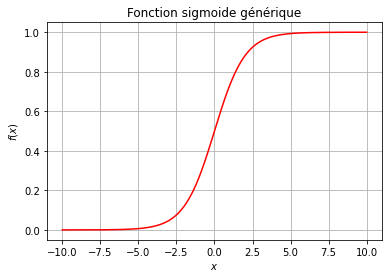

In [6]:
x = np.linspace(-10, 10, 1000)

f = lambda x: ((1+np.exp(-x))**(-1))

plt.plot(x, f(x), "r-")
plt.grid(True)
plt.title(r"Fonction sigmoide générique")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

*b) Améliorez les bornes du résultat précédent en démontrant que $\sigma(-\mu)<x_i^*<\sigma(\sum_{j=1}^2 w_{ij}-\mu)$ lorsque les poids sont non négatifs.  Si possible, améliorez encore plus votre estimation des bornes de l'activité à l'équilibre.*

**Prouver la borne supérieur (à confirmer)?**

Au minimum: alors $x_{j}=0$ ou $w_{ij}=0$. Il reste donc seulement le terme $-\mu$.

C:\Users\antho\AppData\Local\Temp/ipykernel_1712/1648864412.py:11: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda y: ((1+np.exp(-y))**(-1))
C:\Users\antho\AppData\Local\Temp/ipykernel_1712/1648864412.py:11: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda y: ((1+np.exp(-y))**(-1))


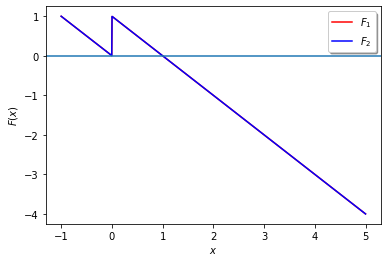

In [7]:
W = np.random.randn(2, 2) * 2.5 + 5
W = np.array([[1, 1],[1, 1]])*1000

x1 = np.linspace(-1, 5, 1000)
x2 = np.linspace(-1, 5, 1000)
x = np.array([x1, x2])



def F_i(i, x, mu, W):
    sigmoid = lambda y: ((1+np.exp(-y))**(-1))
    Sum = 0
    for j in range(2):
        Sum += (W[(i-1),j]*x[j])
    Sum = Sum - mu
    return -x[(i-1)] + sigmoid(Sum)

a = np.random.rand()
b = np.random.rand()

sigma = lambda y: ((1+np.exp(-y))**(-1))


plt.plot(x[0], F_i(1, x, 0, W), "r-", label=r"$F_1$")
plt.plot(x[1], F_i(2, x, 0, W), "b-", label=r"$F_2$")
plt.legend(shadow=True, fancybox=True)
plt.xlabel(r"$x$")
plt.axhline(0)
plt.ylabel(r"$F(x)$")
plt.show()

*c) Obtenez la l'expression de la matrice Jaconienne de $\bm F$ évaluée à un point d'équilibre artibitraire $\bm x^*$.*

In [8]:
w11, w12, x1, x2, u = sp.symbols("w_11 w_12 x_1^* x_2^* u")

dF1_dx1 = sp.diff((-x1 + (1+sp.exp(-(w11 * x1 + w12 * x2 - u))**(-1))), x1)  #dF1/dx1

dF1_dx1

w_11*exp(-u + w_11*x_1^* + w_12*x_2^*) - 1

In [9]:
dF1_dx2 = sp.diff((-x1 + (1+sp.exp(-(w11 * x1 + w12 * x2 - u))**(-1))), x2)  #dF1/dx2

dF1_dx2

w_12*exp(-u + w_11*x_1^* + w_12*x_2^*)

In [10]:
dF2_dx1 = sp.diff((-x2 + (1+sp.exp(-(w21 * x1 + w22 * x2 - u))**(-1))), x1)  #dF2/dx1

dF2_dx1

w_21*exp(-u + w_21*x_1^* + w_22*x_2^*)

In [11]:
dF2_dx2 = sp.diff((-x2 + (1+sp.exp(-(w21 * x1 + w22 * x2 - u))**(-1))), x2)  #dF1/dx1

dF2_dx2

w_22*exp(-u + w_21*x_1^* + w_22*x_2^*) - 1

La matrice du Jacobien est donc :

In [12]:
J = sp.Matrix([[dF1_dx1, dF1_dx2],[dF2_dx1, dF2_dx2]])

J

Matrix([
[w_11*exp(-u + w_11*x_1^* + w_12*x_2^*) - 1,     w_12*exp(-u + w_11*x_1^* + w_12*x_2^*)],
[    w_21*exp(-u + w_21*x_1^* + w_22*x_2^*), w_22*exp(-u + w_21*x_1^* + w_22*x_2^*) - 1]])

*d) Supposez que $w_{12}=0=w_{21}$.  Quels types de points d'équilibres sont possibles?   Justifiez brièvement.*  

Dans la matrice Jacobienne, on constate que si $w_{12}=0=w_{21}$, alors il reste seulement les termes de la diagonale qui sont potentiellement non nulle. Il est donc possible de d'obtenir une équilibre stable en raison du $-1$ ($dF/dx < 0$ est stable) ou d'obtenir une équilibre instable. Ainsi, selon la valeur et le signe des poids, il est possible d'obtenir une équilibre stable ou instable. Les deux types sont possibles puisque les termes peuvent être négatifs ou positifs.

*e) Supposez que $w_{11}=0=w_{22}$.  Quels types de points d'équilibres sont possibles?   Justifiez brièvement.*

Ici, les termes de la diagonale tombent à zéro. Les termes restant possèdent le même signe que le poid qui les multiplient. Si les poids sont excitateurs, alors la dérivée sera supérieure à 0 et donc le point d'équilibre sera instable. Si les poids restants sont inhibiteurs, la dérivée sera inférieur à 0 et donc le point d'équilibre sera stable.

*g) Supposez que $w_{12}=0=w_{21}$.  Utilisez un argument géométrique pour justifier le fait qu'il existe toujours entre 1 et 3 points d'équilibre par neurone.*

L'activité de la neurone $i$ est décrite par $x_i$. Lorsque $w_{12}=0=w_{21}$, alors l'équation de la neurone $i=1$ passe de $\dot{x}_1 = -x_1 + \sigma(w_{11}x_1 + w_{12}x_2 - \mu)$ à $\dot{x}_i = -x_i + \sigma(w_{11}x_1 - \mu)$. On vient de perdre une dimension et on retombe sur une équation similaire à $\dot{x} = -x + \Sigma(wx)$ où nous avons déjà montrée que ce genre d'équation comporte toujours entre 1 et 3 points fixes. On peut d'ailleurs le représenter graphiquement :

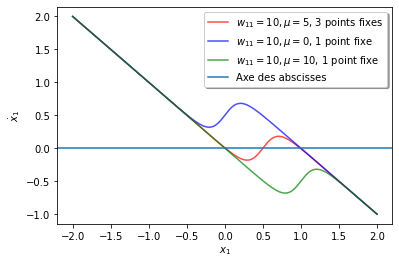

In [43]:
x = np.linspace(-2, 2, 1000)

def x_dot(x, w, mu):
    sigma = lambda x: ((1+np.exp(-x))**(-1))
    return -x + sigma(w*x-mu)

plt.plot(x, x_dot(x, 10, 5), "r-", alpha=0.7, label=r"$w_{11} = 10, \mu = 5$, 3 points fixes")
plt.plot(x, x_dot(x, 10, 0), "b-", alpha=0.7, label=r"$w_{11} = 10, \mu = 0$, 1 point fixe")
plt.plot(x, x_dot(x, 10, 10), "g-", alpha=0.7, label=r"$w_{11} = 10, \mu = 10$, 1 point fixe")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\dot{x}_1$")
plt.axhline(0, label="Axe des abscisses")
plt.legend(shadow=True, fancybox=True)
plt.show()

Supposez que $w_{11}=0=w_{22}$. Modifiez votre argument précédent  pour justifier le fait qu'il existe toujours entre 1 et 3 points d'équilibre par neurone.

L'argument ici est similaire qu'au numéro précédent. En posant que $w_{11}=0=w_{22}$ nous perdons une dimension. On passe donc de l'équation : $\dot{x_i} = -x_i + \sigma(w_{i1}x_1 + w_{i2}-\mu)$. Pour $i=1$, le premier terme de la sigmoide va tomber à 0 alors que pour $i=2$, c'est le deuxième terme qui va tomber. Dans tous les cas, on tombe en une dimension et on retrouve une équation de la forme $\dot{x} = -x + \Sigma(wx)$

*h) Considérez le cas général en divisant la matrice jacobienne:*

$\mathbf{J} = \begin{bmatrix} -1&0\\0&1\end{bmatrix} + \begin{bmatrix}a&0\\0&b \end{bmatrix} + \begin{bmatrix}0&c\\d&0\end{bmatrix} = \begin{bmatrix}a-1&c\\ d&b-1\end{bmatrix}$. 

$a = w_{11}\exp{(-\mu + w_{11}x_1^* + w_{12}x_2^*)}$

$b = w_{22}\exp{(-\mu + w_{21}x_1^* + w_{22}x_2^*)}$

$c = w_{12}\exp{(-\mu + w_{11}x_1^* + w_{12}x_2^*)}$

$d = w_{21}\exp{(-\mu + w_{21}x_1^* + w_{22}x_2^*)}$

*i) Décomposez la fonction $\bm F$ selon l'équation $ \bm F(\bm x)=-\bm x + \bm G(\bm x)$.  Ainsi, $\bm x^*$ est un point d'équilibre ssi $\bm x^*$ est un point fixe de la fonction $\bm G$, c.-à-d. $\bm G(\bm x^*)=\bm x^*$.  Utilisez le théorème du point fixe de Brouwer pour démontrer que la dynamique possède toujours au moins un point d'équilibre.*

\begin{bmatrix} -x_1\\ -x_2 \end{bmatrix} + \sigma \begin{bmatrix} w_{11}x_1 + w_{12}x_2 - \mu_1 \\ w_{21}x_1 + w_{22}x_2 - \mu_2 \end{bmatrix} = -\vec{x} + \sigma[\mathbf{W}\vec{x}-\vec{\mu}]

On conclut donc que $\mathbf{G}(\vec{x}) = \sigma \begin{bmatrix} w_{11}x_1 + w_{12}x_2 - \mu_1 \\ w_{21}x_1 + w_{22}x_2 - \mu_2 \end{bmatrix} = \sigma[\mathbf{W}\vec{x}-\vec{\mu}]$

Nous avons deux fonctions, soit $x_1$ et $x_2$. Le vecteur $\mathbf{x}^*$ est composé de $x_1^*$ et $x_2^*$. On peut tracer un graphique de ${G}(x)$ en fonction de $x$. Ainsi, le point où $x^* = G(x^*)$ est l'intersection entre $G(x)$ est une droite linéaire. Puisque les fonctions sigmoides sont continues, il y a forcément un point d'intersection entre la sigmoide et le point d'intersection. On peut d'ailleurs faire une petite représentation graphique pour illustrer le tout :

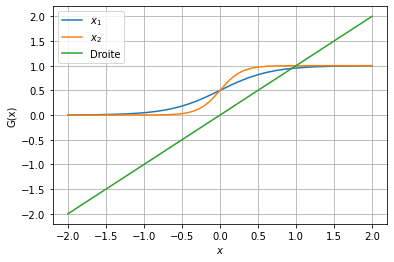

In [97]:
from scipy import linalg

w = np.array([[1,2],[3,4]])  # Matrice de poid quelconque
x1 = np.linspace(-2, 2, 1000)  #Prépare nos x 
x2 = np.linspace(-2, 2, 1000)
x = np.array([[x1, x2]]).T   #Vecteur x

g = w @ x  # On calcul W*x

G = np.zeros((2, len(g)))

sigmoid = lambda x: ((1+np.exp(-x))**(-1))

for i in range(len(g)):
    g[i][0] = sigmoid(g[i][0])
    g[i][1] = sigmoid(g[i][1])
    G[:,i] = g[i].T   #On effectue la sigmoid avec mu = 0



plt.plot(x1, G[0], label=r"$x_1$")
plt.plot(x1, G[1], label=r"$x_2$")
plt.plot(x1, x1, label=r"Droite")  #On place une droite. Les points qui croise cette droite n'ont pas subi de transformation. Ce sont les x^*
plt.legend()                       # On constate que leur valeur original (x^*) est la même qu'avec G(x^*) 
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"G(x)")
plt.show()